# Distribution fitting in R

![](https://i.imgur.com/zpgEu5r.png)

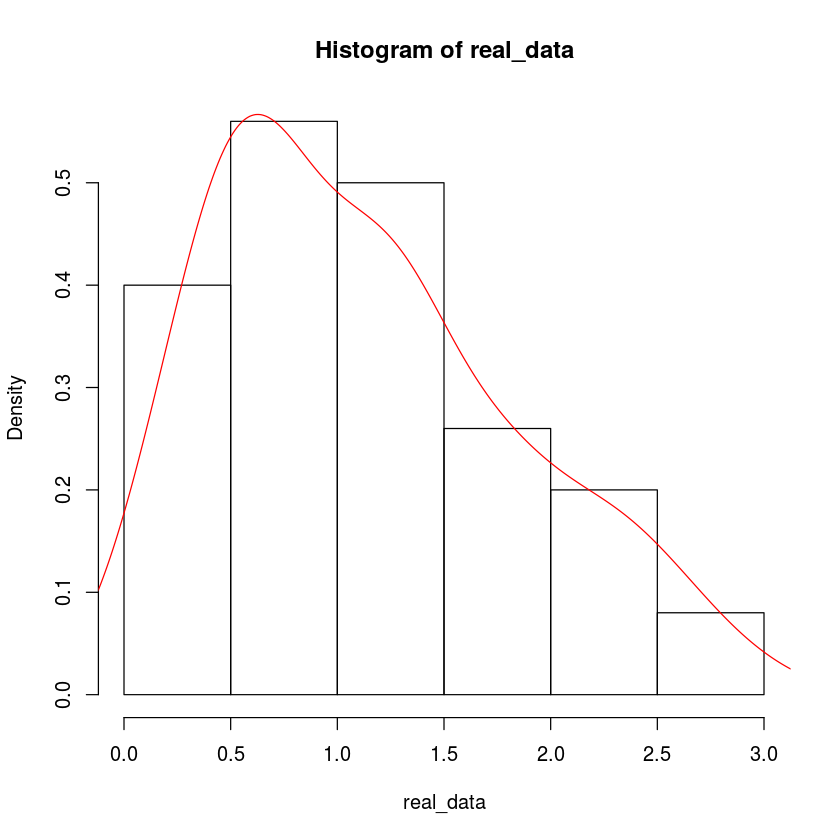

In [1]:
set.seed(12345)  # We want reproducibility, thus use a seed
size = 100
values <- rexp(size, 4)  # Generate exponential distribution

# Generate random Gaussian noise N(0,1)
noise <- rnorm(size)

# Add noise to the exponential distributed data
# so as to look more realistic
real_data <- values + abs(noise)

# Consider rea_ data to be the values that you want to fit
hist(real_data, prob = TRUE)
lines(density(real_data), col="red")

Loading required package: MASS
Loading required package: survival


summary statistics
------
min:  0.07059372   max:  2.997179 
median:  1.032011 
mean:  1.130135 
estimated sd:  0.7079087 
estimated skewness:  0.6239219 
estimated kurtosis:  2.581336 

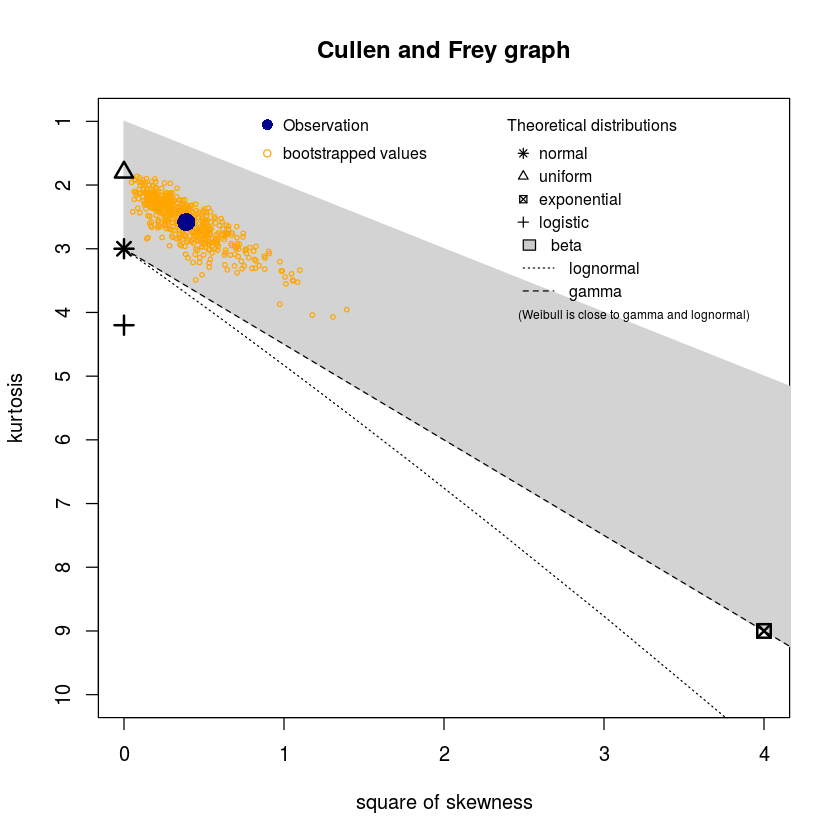

In [2]:
# Import library
library(fitdistrplus)

# Cullen and Frey graph (see sources at the end of the notebook)
descdist(real_data, discrete = FALSE, boot=500)

### We will fit three distribution (as suggested by the graph above):
    - Weibull
    - Gamma
    - Lognorm

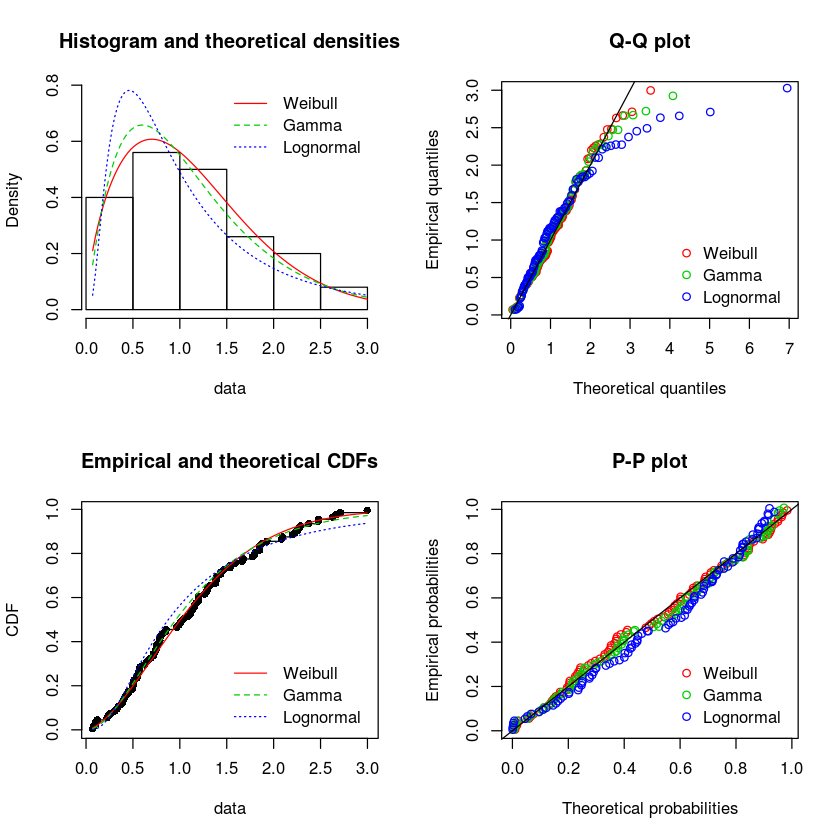

In [3]:
fw <- fitdist(real_data, "weibull")
fg <- fitdist(real_data, "gamma")
fln <- fitdist(real_data, "lnorm")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "Gamma", "Lognormal")
denscomp(list(fw, fg, fln), legendtext = plot.legend)
qqcomp(list(fw, fg, fln), legendtext = plot.legend)
cdfcomp(list(fw, fg, fln), legendtext = plot.legend)
ppcomp(list(fw, fg, fln), legendtext = plot.legend)

### We can plot graph for single fitting distributions 

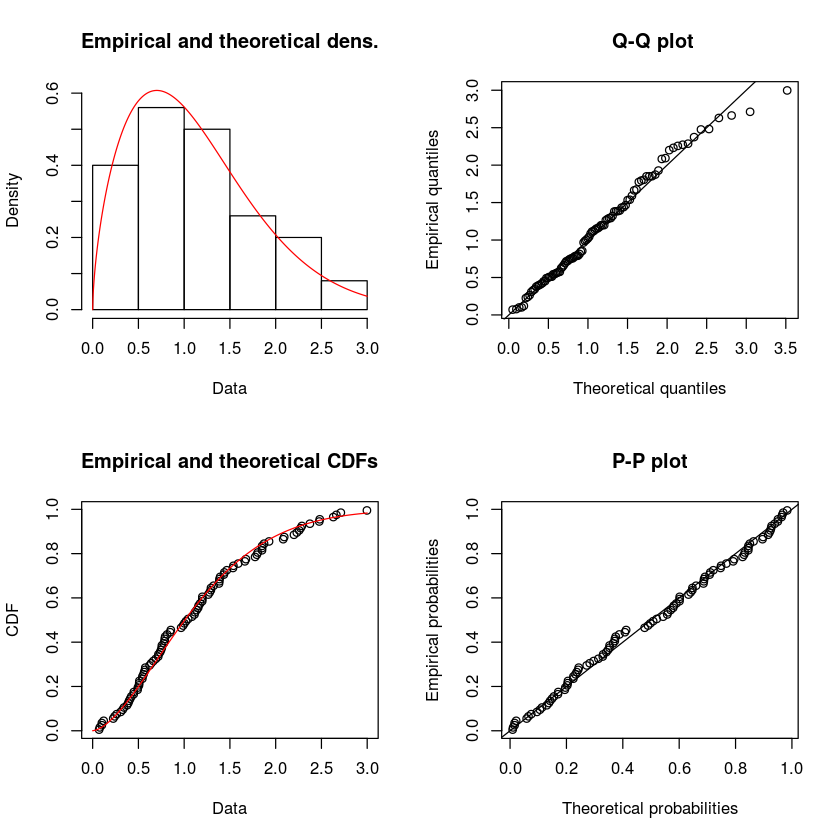

In [4]:
plot(fw)

### ECDF and distances between theoretical CDFs

    - Distances between ECDF and Theoretical CDF is the statistics used by KS-Test

Max distance for weibull is: 0.05513064 
Max distance for gamma is: 0.06248799 
Max distance for lognorm is: 0.09625451 


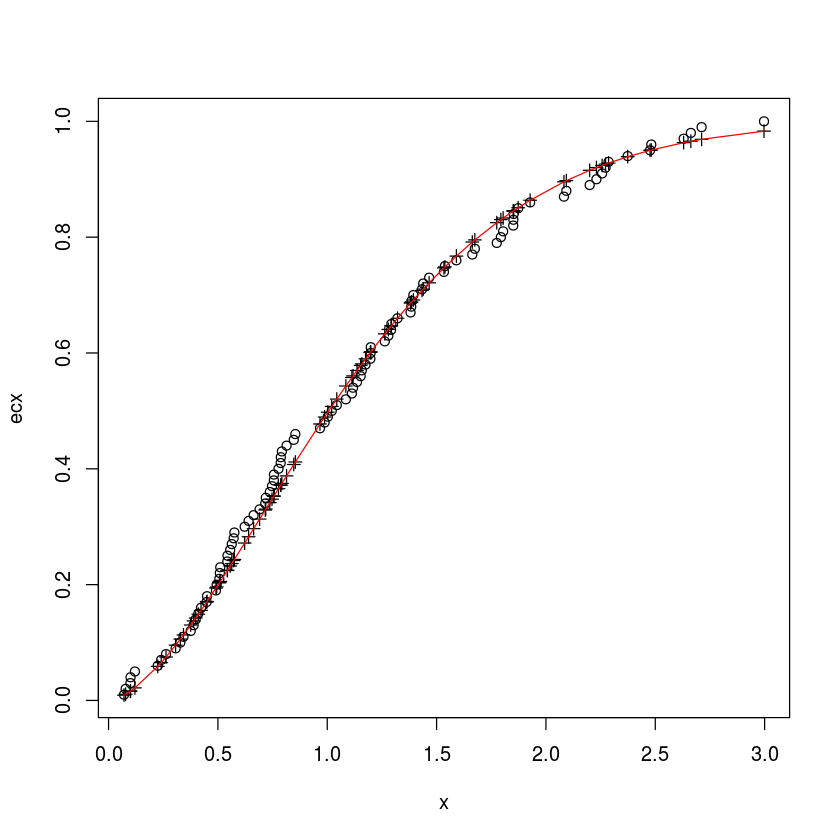

In [5]:
# par(mfrow = c(1, 2))

x <- sort(real_data)
ecx <- cumsum(rep(1/100, 100))

plot(x, ecx)
fx <- pweibull(x, fw$estimate[[1]], fw$estimate[[2]])
points(x, fx, pch=3)
lines(x, fx, col = "red")
cat("Max distance for weibull is:", max(abs(fx - ecx)), "\n")

ecx <- cumsum(c(0, rep(1/100, 99)))
# plot(x, ecx)
fx <- pgamma(x, shape=fg$estimate[[1]], rate=fg$estimate[[2]])
# points(x, fx, pch=3)
# lines(x, fx, col = "red")
cat("Max distance for gamma is:", max(abs(fx - ecx)), "\n")

fx <- plnorm(x, fln$estimate[[1]], fln$estimate[[2]])
cat("Max distance for lognorm is:", max(abs(fx - ecx)), "\n")

** We can plot (below) a single graph of the first 4-panel **
    - In this case the CDF
        - Compare with graph above

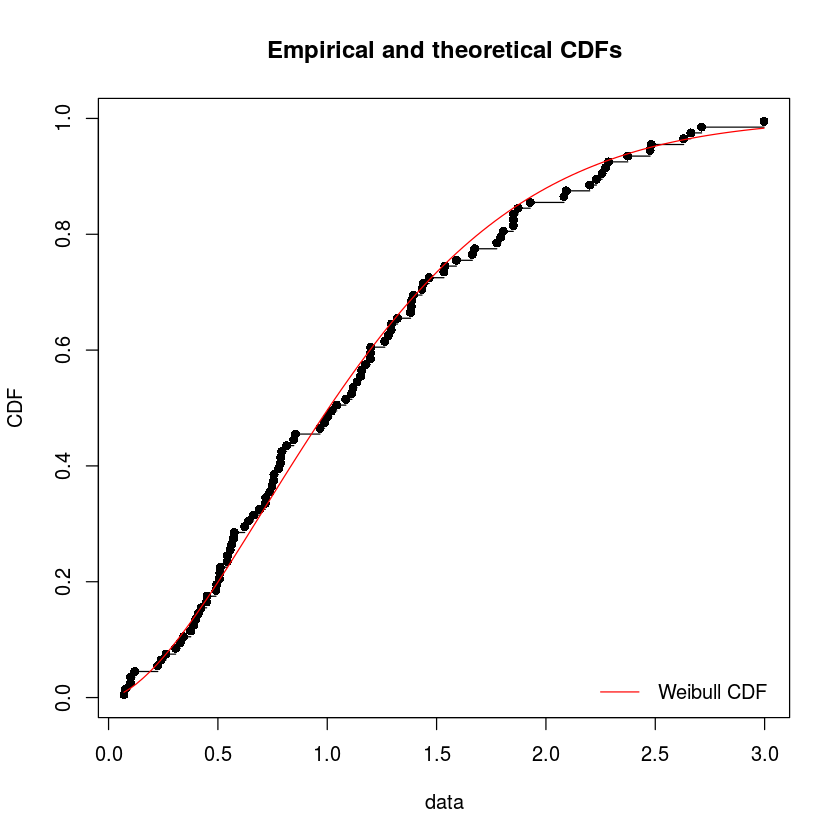

In [6]:
cdfcomp(fw, legendtext = "Weibull CDF")

### Let's perform a KS test using R functions

In [7]:
ksw <- ks.test(unique(real_data), "pweibull", shape=t(fw$estimate)[1], scale = t(fw$estimate)[2]) 
cat("For Weibull distribution p-value is:",ksw[[2]],"\n")
ksg <- ks.test(unique(real_data), "pgamma", shape=t(fg$estimate)[1], rate = t(fg$estimate)[2]) 
cat("For Gamma distribution p-value is:",ksg[[2]],"\n")
ksln <- ks.test(unique(real_data), "plnorm", mean = t(fln$estimate)[1], sd = t(fln$estimate)[2]) 
cat("For Log-normal distribution p-value is:",ksln[[2]],"\n")

For Weibull distribution p-value is: 0.9214988 
For Gamma distribution p-value is: 0.8297271 
For Log-normal distribution p-value is: 0.3123451 


### See the test summary 
    - D should be equal to the manual calculated distance above

In [8]:
print("KS-test for Weibull"); print(ksw)
print("KS-test for Gamma"); print(ksg)
print("KS-test for Lognormal"); print(ksln)

[1] "KS-test for Weibull"

	One-sample Kolmogorov-Smirnov test

data:  unique(real_data)
D = 0.055131, p-value = 0.9215
alternative hypothesis: two-sided

[1] "KS-test for Gamma"

	One-sample Kolmogorov-Smirnov test

data:  unique(real_data)
D = 0.062488, p-value = 0.8297
alternative hypothesis: two-sided

[1] "KS-test for Lognormal"

	One-sample Kolmogorov-Smirnov test

data:  unique(real_data)
D = 0.096255, p-value = 0.3123
alternative hypothesis: two-sided



### Fitting discrete distribution

In [9]:
data("toxocara")  # Data included in R
str(toxocara)  # Data structure
summary(toxocara)  # Data summary

'data.frame':	53 obs. of  1 variable:
 $ number: int  0 0 0 0 0 0 0 0 0 0 ...


     number      
 Min.   : 0.000  
 1st Qu.: 0.000  
 Median : 2.000  
 Mean   : 8.679  
 3rd Qu.: 9.000  
 Max.   :75.000  

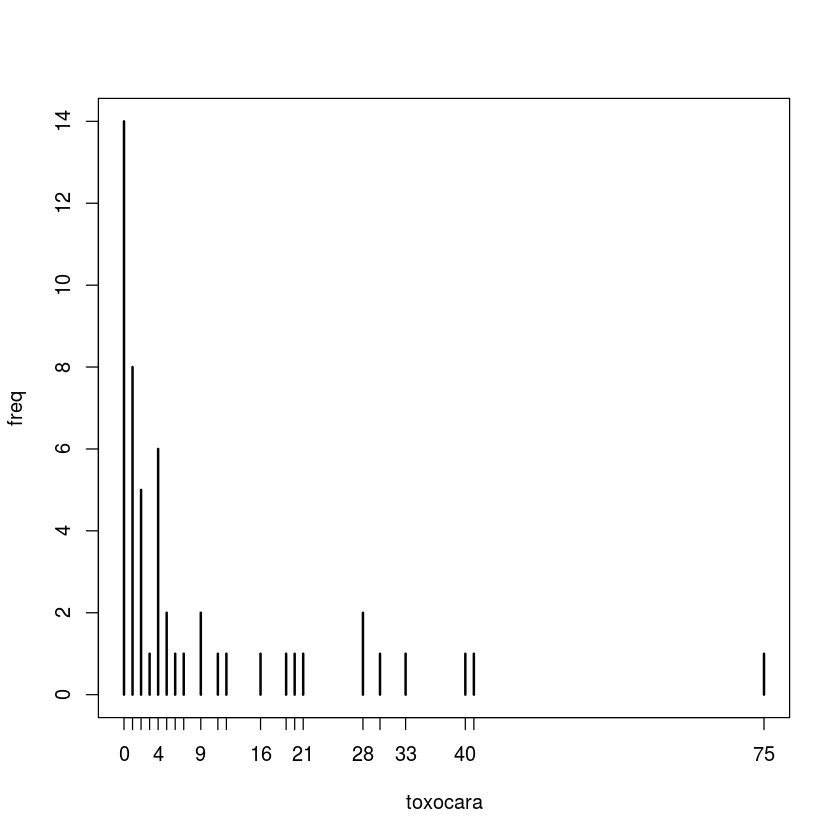

toxocara
 0  1  2  3  4  5  6  7  9 11 12 16 19 20 21 28 30 33 40 41 75 
14  8  5  1  6  2  1  1  2  1  1  1  1  1  1  2  1  1  1  1  1 

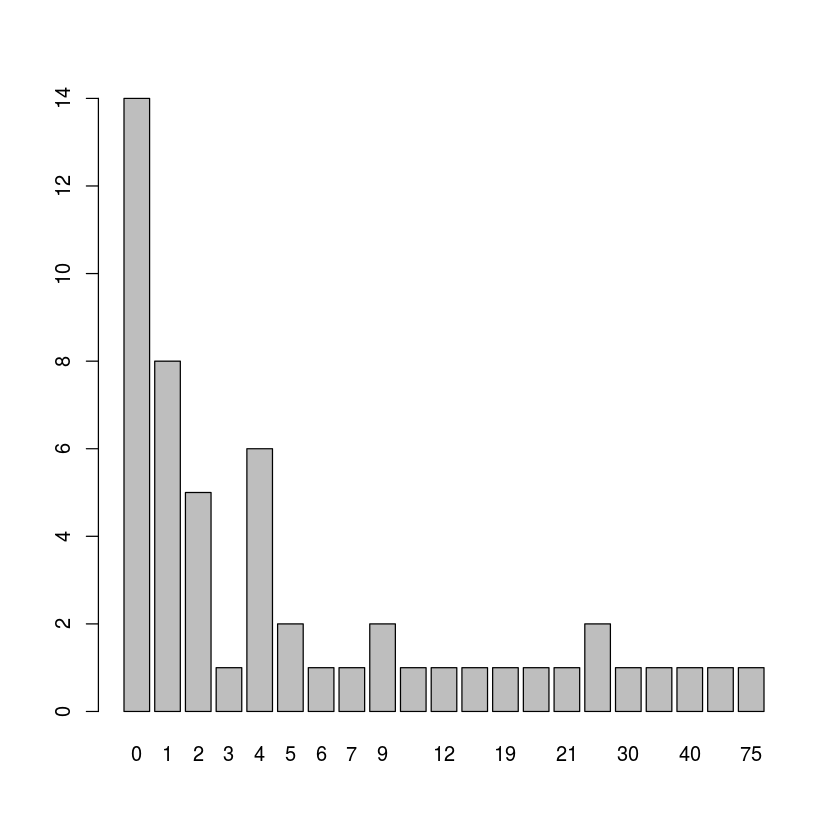

In [10]:
# Build a table with frequencies for unique observation
freq <- table(toxocara)  
plot(freq)  # plot frequencies
barplot(freq)  # barplot
freq

In [11]:
# fit poisson distribution
(ftoxo.P <- fitdist(toxocara$number, "pois"))

Fitting of the distribution ' pois ' by maximum likelihood 
Parameters:
       estimate Std. Error
lambda 8.679245  0.4046719

In [12]:
# fit negative binomial distribution
(ftoxo.nb <- fitdist(toxocara$number, "nbinom"))

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters:
      estimate Std. Error
size 0.3971457 0.08289027
mu   8.6802520 1.93501003

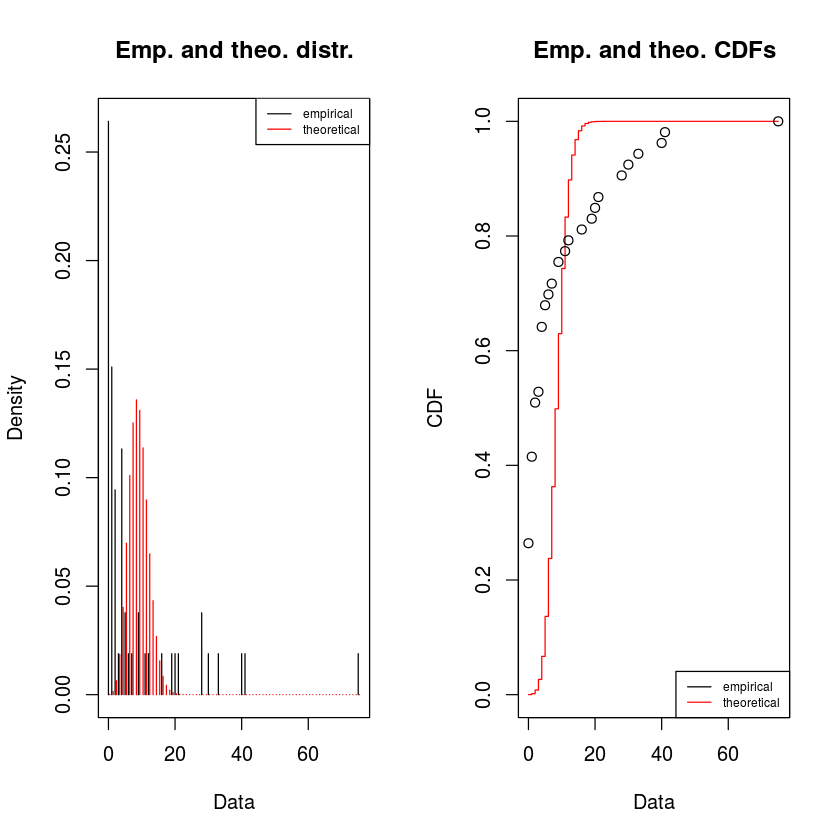

In [13]:
# Plot the empirical vs theoretical fitted PMF and CDF
plot(ftoxo.P)

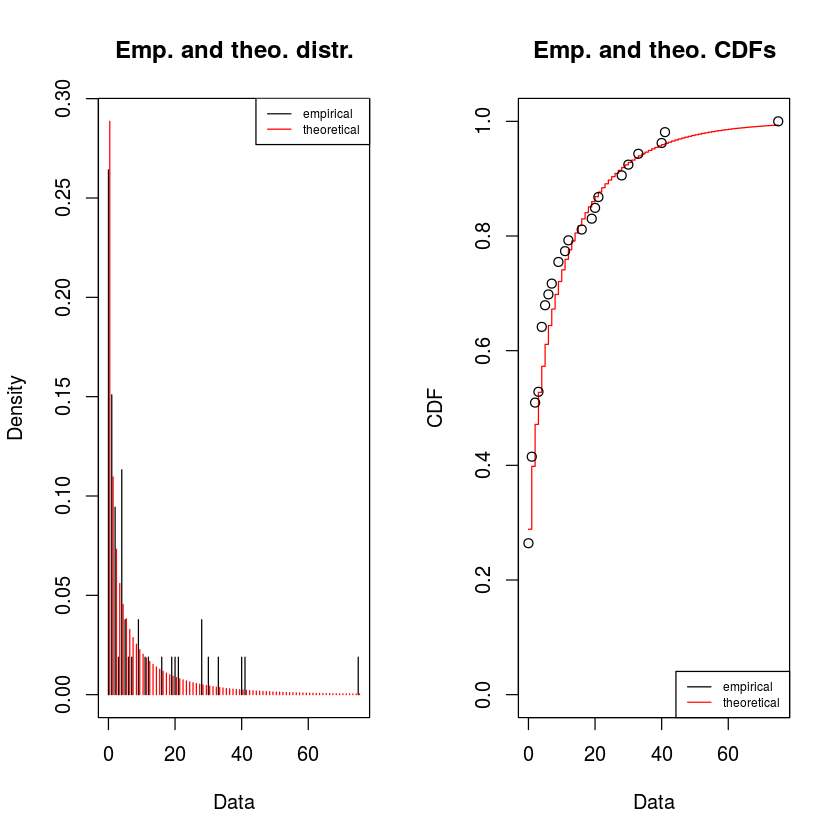

In [14]:
# Plot the empirical vs theoretical fitted PMF and CDF
plot(ftoxo.nb)

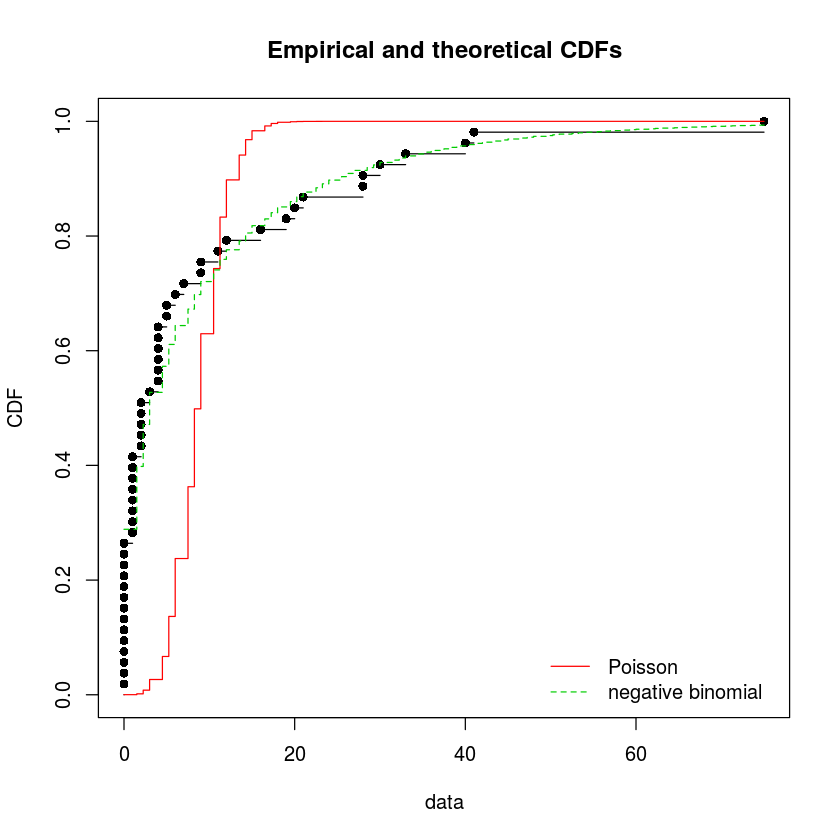

In [15]:
# See both theo CDFs vs ECDF
cdfcomp(list(ftoxo.P, ftoxo.nb), legendtext = c("Poisson", "negative binomial"))

In [16]:
# Goodness of fit test
gofstat(list(ftoxo.P, ftoxo.nb),
        fitnames = c("Poisson", "negative binomial"), discrete=TRUE)

Chi-squared statistic:  31256.96 7.48606 
Degree of freedom of the Chi-squared distribution:  5 4 
Chi-squared p-value:  0 0.1123255 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
      obscounts theo Poisson theo negative binomial
<= 0         14  0.009014207              15.295027
<= 1          8  0.078236512               5.808596
<= 3          6  1.321767215               6.845015
<= 4          6  2.131297776               2.407815
<= 9          6 29.827829221               7.835196
<= 21         6 19.626223732               8.271110
> 21          7  0.005631339               6.537242

Goodness-of-fit criteria
                                Poisson negative binomial
Akaike's Information Criterion 1017.067          322.6882
Bayesian Information Criterion 1019.037          326.6288

### Test goodness of fit using simulation envelopes
    - Weibull distribution fitting (see above)
    - See: https://drive.google.com/file/d/0B-dmEvN59Z2ZWkNGZ1IyZjNZNWc/view, slide 16-18

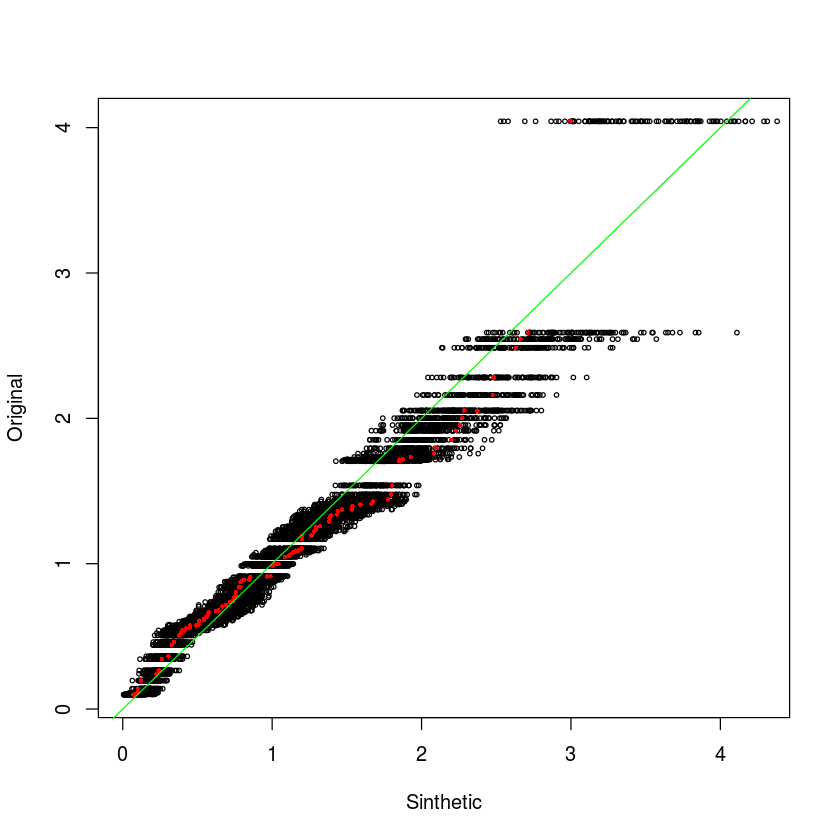

In [17]:
Original <- rweibull(100, fw$estimate[[1]], fw$estimate[[2]])
Sinthetic <- rweibull(100, fw$estimate[[1]], fw$estimate[[2]])
qqplot(Sinthetic, Original, cex=0.5)

for (i in seq(2,100)) {
    Sinthetic <- rweibull(100, fw$estimate[[1]], fw$estimate[[2]])
    points(sort(Sinthetic), sort(Original), cex=0.5)
}

points(sort(real_data), sort(Original), col = "red", cex=0.5, pch=16)
abline(0, 1, col = "green")

### Sources:

- https://cran.r-project.org/web/packages/fitdistrplus/vignettes/paper2JSS.pdf
- https://stats.stackexchange.com/questions/333495/fitting-a-probability-distribution-and-understanding-the-cullen-and-frey-graph
- https://stats.stackexchange.com/questions/189941/skewness-kurtosis-plot-for-different-distribution
- http://people.stern.nyu.edu/adamodar/pdfiles/papers/probabilistic.pdf

In [18]:
fg

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
      estimate Std. Error
shape 2.126951  0.2804146
rate  1.882202  0.2797017

In [19]:
fln

Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
          estimate Std. Error
meanlog -0.1308046 0.08034524
sdlog    0.8034524 0.05681227